In [1]:
# Importing the dataset from keras
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

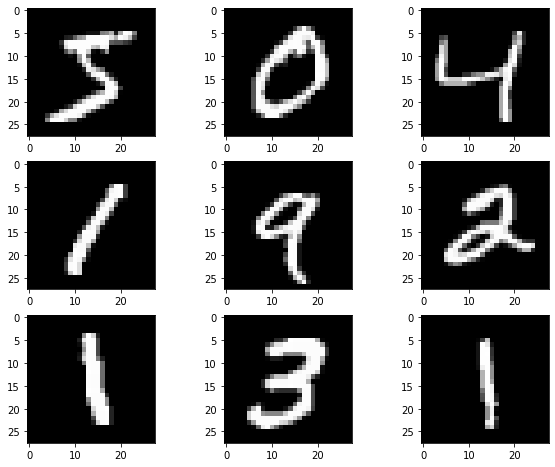

In [3]:
import matplotlib.pyplot as plt

plt.gray() # B/W Images
plt.figure(figsize = (10,8)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [4]:
# Printing examples in 'y_train'
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [5]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [6]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [8]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans


total_clusters = len(np.unique(y_test))

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)

x_train = x_train.reshape(len(x_train),-1)
# Fitting the model to training set
kmeans.fit(x_train)

MiniBatchKMeans(n_clusters=10)

In [9]:
kmeans.labels_


array([7, 5, 3, ..., 7, 8, 9], dtype=int32)

In [10]:
def retrieve_info(cluster_labels,y_train):
    """Associates most probable label with each cluster in KMeans model
       returns: dictionary of clusters assigned to each label
     """

  # Initializing
    reference_labels = {}
  # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [11]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [12]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[8 0 6 1 7 2 1 8 1 7 3 1 3 6 1 7 2 8 1 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [13]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5434


Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)